#### Dataset Description

This dataset contains detailed information about used cars, including features such as:

- **Car Name**
- **Kilometers Driven**
- **Fuel Type**
- **Transmission Type**
- **Year of Manufacture**
- **Engine Capacity (CC)**
- **Number of Seats**
- **Ownership History**

and Target  
**car_prices_in_rupee**

These features are used to build a predictive model for estimating the price of second-hand cars based on their specifications and condition.

#### Data Source  
The dataset was obtained from [Kaggle - Old Car Price Prediction](https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction)


## Relevant Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras

### Exploratory Data Anaysis and Preprocessing

In [5]:
raw_data = pd.read_csv('car data\car_price.csv')
raw_data.columns

Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [6]:
raw_data.drop('Unnamed: 0',axis=1,inplace=True)
df= raw_data.copy()
df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [7]:
df.describe(include='all')

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
count,5512,5512,5512,5512,5512,5512,5512.000000,5512,5512
unique,1896,1300,2610,5,2,6,NaN,139,6
top,Maruti Alto 800 LXI,4.50 Lakh,"80,000 kms",Petrol,Manual,1st Owner,NaN,1197 cc,5 Seats
freq,53,62,163,2967,3962,3736,NaN,714,4673
mean,NaN,NaN,NaN,NaN,NaN,NaN,2015.455552,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.927974,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN


In [8]:
df.dropna(axis=1 ,inplace=True)

In [9]:
df.describe(include='all')
df['Seats']=[int(seat[0]) for seat in df['Seats']]


In [10]:

df['car_prices_in_rupee'] = df['car_prices_in_rupee'].replace({"Lakh": "", "Crore": "",",": ""}, regex=True)
df['car_prices_in_rupee'] = [float(price.strip()) for price in df['car_prices_in_rupee']]
df.describe(include='all')

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
count,5512,5512.000000,5512,5512,5512,5512,5512.000000,5512,5512.000000
unique,1896,NaN,2610,5,2,6,NaN,139,NaN
top,Maruti Alto 800 LXI,NaN,"80,000 kms",Petrol,Manual,1st Owner,NaN,1197 cc,NaN
freq,53,NaN,163,2967,3962,3736,NaN,714,NaN
mean,NaN,1700.984784,NaN,NaN,NaN,NaN,2015.455552,NaN,5.250726
std,NaN,11471.329530,NaN,NaN,NaN,NaN,3.927974,NaN,0.720075
min,NaN,1.000000,NaN,NaN,NaN,NaN,1995.000000,NaN,2.000000
25%,NaN,3.250000,NaN,NaN,NaN,NaN,2013.000000,NaN,5.000000
50%,NaN,5.640000,NaN,NaN,NaN,NaN,2016.000000,NaN,5.000000
75%,NaN,10.892500,NaN,NaN,NaN,NaN,2018.000000,NaN,5.000000


In [11]:
df['kms_driven']= df['kms_driven'].replace({"kms": "",",": ""}, regex=True).astype(int)
df['transmission']=df['transmission'].map({'Manual':0,'Automatic':1})

df_encoded_fuel = pd.get_dummies(df, columns=['fuel_type'],dtype=int)

encoder = LabelEncoder()

df_encoded_fuel['ownership'] = encoder.fit_transform(df['ownership'])
df_encoded_fuel.drop(['car_name','engine'],axis=1,inplace=True)
cleaned_data =  df_encoded_fuel.copy()

In [12]:
cleaned_data.describe(include='all')

,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,Seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,1700.984784,63211.888062,0.281205,1.421807,2015.455552,5.250726,0.014514,0.439586,0.002540,0.005080,0.538280
std,11471.329530,41844.131167,0.449628,0.703092,3.927974,0.720075,0.119607,0.496382,0.050338,0.071098,0.498578
min,1.000000,250.000000,0.000000,0.000000,1995.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250000,33151.750000,0.000000,1.000000,2013.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.640000,59000.000000,0.000000,1.000000,2016.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,10.892500,84265.250000,1.000000,2.000000,2018.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,99999.000000,560000.000000,1.000000,5.000000,2022.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
cleaned_data['car_prices_in_rupee'].min()

1.0

In [14]:
cleaned_data['kms_driven'].max()

560000

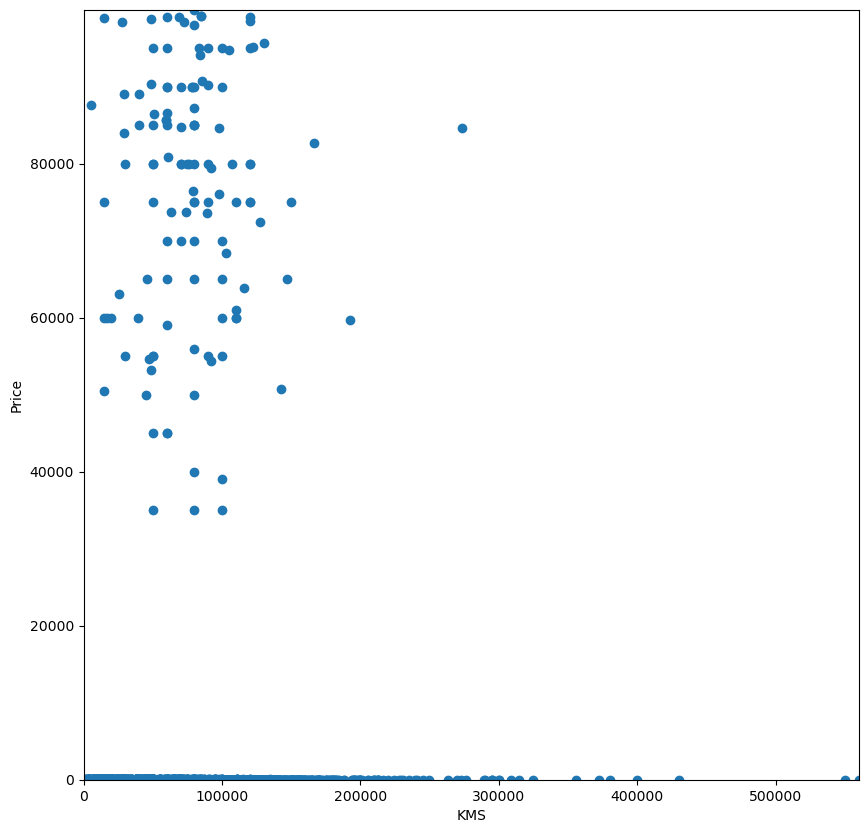

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(cleaned_data['kms_driven'],(cleaned_data['car_prices_in_rupee']))
plt.xlabel('KMS')
plt.ylim(-1,99999)
plt.xlim(-1,560000)
plt.ylabel('Price')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(cleaned_data['kms_driven'],(cleaned_data['ownership']))
plt.xlabel('kms driven')
plt.title('Ownership vs kms driven')
plt.ylabel('Ownership')
plt.show()

## Data with Outliers 

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(cleaned_data['manufacture'],(cleaned_data['car_prices_in_rupee']))
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

In [16]:
percentile_90 = np.percentile(cleaned_data['car_prices_in_rupee'], 90)
#removing outliers from dataset
cleaned_data = cleaned_data[(cleaned_data['car_prices_in_rupee'] <= percentile_90)]
cleaned_data.describe(include='all')

,car_prices_in_rupee,kms_driven,transmission,ownership,manufacture,Seats,fuel_type_Cng,fuel_type_Diesel,fuel_type_Electric,fuel_type_Lpg,fuel_type_Petrol
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,6.854902,65345.409595,0.226567,1.427938,2015.383592,5.250756,0.016126,0.429752,0.002822,0.004435,0.546866
std,5.683597,42143.171943,0.418652,0.699148,3.704918,0.717587,0.125972,0.495091,0.053053,0.066452,0.497849
min,1.000000,250.000000,0.000000,0.000000,1995.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.020000,36000.000000,0.000000,1.000000,2013.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.100000,60000.000000,0.000000,1.000000,2016.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.320000,86269.000000,0.000000,2.000000,2018.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,30.500000,560000.000000,1.000000,5.000000,2022.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(cleaned_data['manufacture'],(cleaned_data['car_prices_in_rupee']))
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(cleaned_data['kms_driven'],(cleaned_data['car_prices_in_rupee']))
plt.xlabel('KMS')

plt.ylabel('Price')
plt.show()

C:\Users\kwksi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kwksi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kwksi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kwksi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

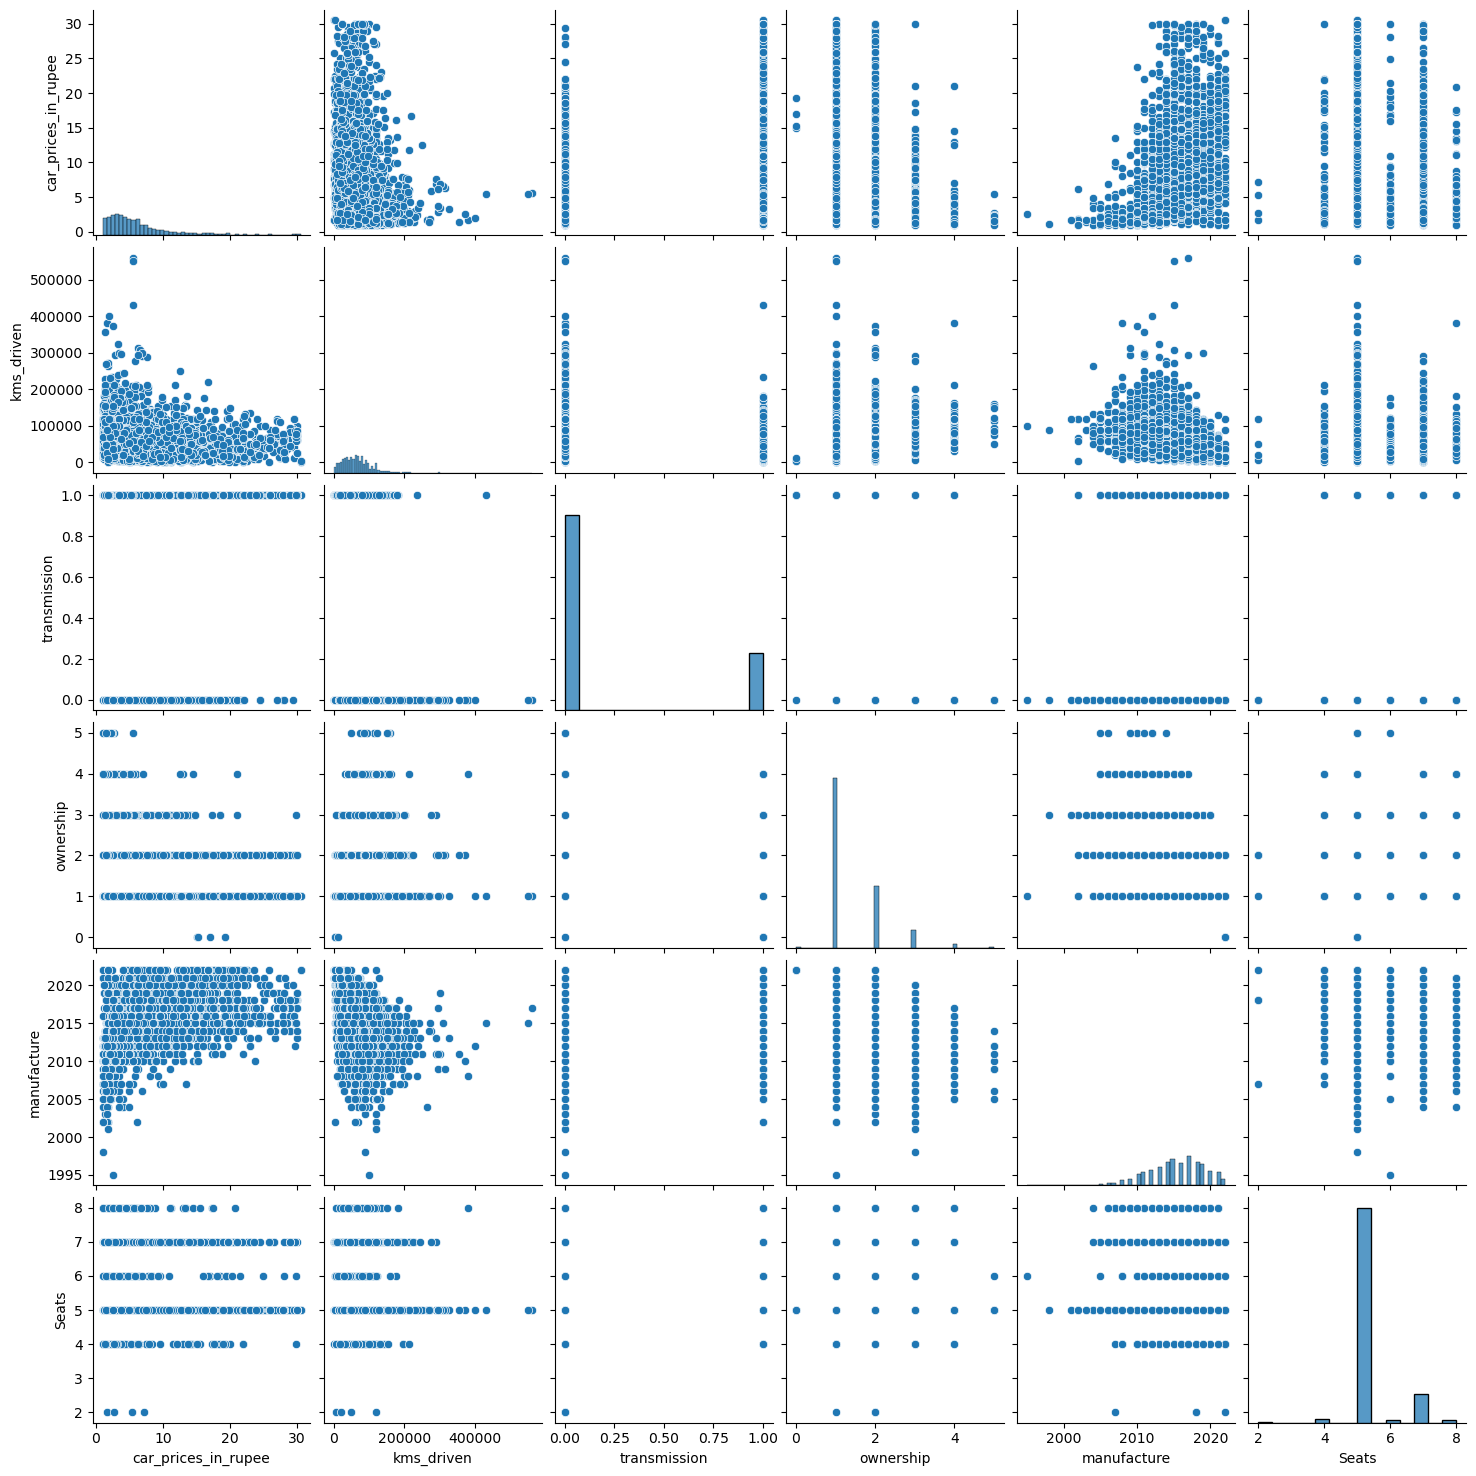

In [17]:
import seaborn as sns
sns.pairplot(cleaned_data[['car_prices_in_rupee', 'kms_driven', 'transmission', 'ownership',
       'manufacture', 'Seats']],
)

In [25]:
X = cleaned_data.iloc[:,1:] #features
y=cleaned_data['car_prices_in_rupee'] #target

In [26]:
# Split the data into training+validation and test sets (80% training, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [27]:

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set, and transform the test and validation sets
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape

(3174, 10)

In [29]:
X_val.shape

(794, 10)

In [30]:
X_test.shape

(993, 10)

## Neural Network


In [35]:
model = Sequential([
    Dense(units=64, input_dim=X_train.shape[1], activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1)  # Output layer, no activation for regression
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae'])
model.summary()


# Define the early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',    # Watch validation loss
    patience=10,           # Stop after 10 epochs of no improvement
    restore_best_weights=True
)


C:\Users\kwksi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ dense_4 (Dense)          │ (None, 64)        │       704 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_5 (Dense)          │ (None, 32)        │     2,080 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_6 (Dense)          │ (None, 16)        │       528 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_7 (Dense)          │ (None, 1)         │        17 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Fit the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 49.8922 - mae: 4.8748 - val_loss: 18.8179 - val_mae: 2.7267
Epoch 2/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 17.4324 - mae: 2.6888 - val_loss: 15.1561 - val_mae: 2.4223
Epoch 3/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.9261 - mae: 2.4145 - val_loss: 14.6724 - val_mae: 2.3981
Epoch 4/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.1140 - mae: 2.4413 - val_loss: 15.1299 - val_mae: 2.4008
Epoch 5/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.2142 - mae: 2.4077 - val_loss: 14.7164 - val_mae: 2.4382
Epoch 6/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.4944 - mae: 2.3960 - val_loss: 14.6746 - val_mae: 2.4760
Epoch 7/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 14.5673 - mae: 2.4118 - val_loss: 14.4432 - val_mae: 2.3735
Epoch 8/500
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.2553 - mae: 2.2996 - val_loss: 14.6506 - val_mae: 2.3535
Epoch 9/500
100/100 ━━━━━━━━━━

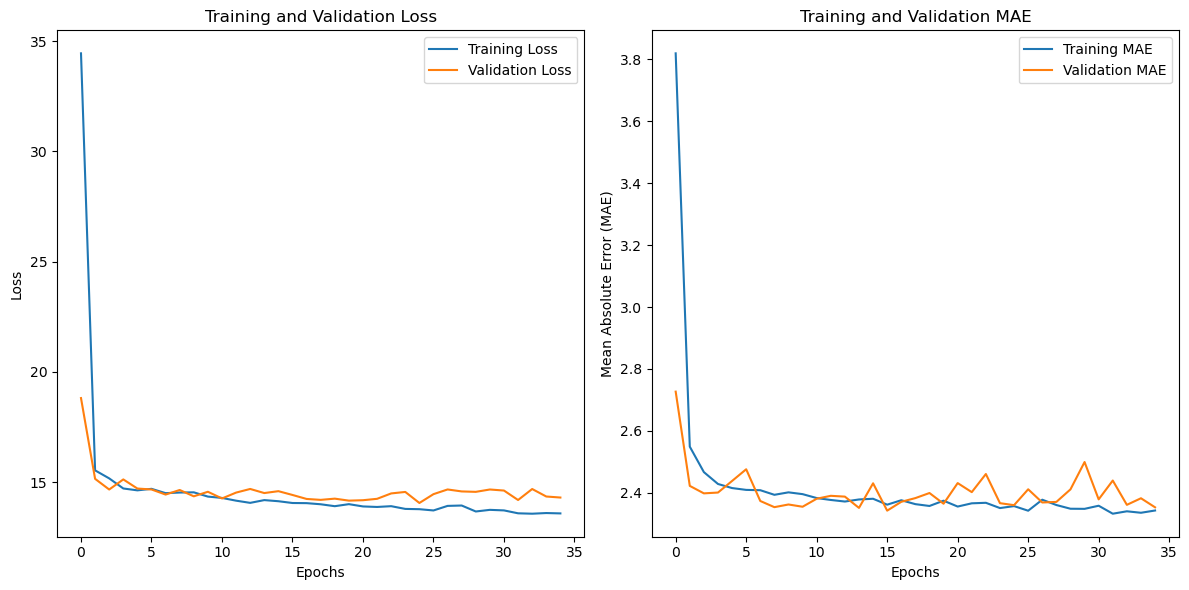

In [37]:
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot (for regression, accuracy might not be applicable, but you can plot MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Test the model

In [50]:
# Predict using the test features
y_pred = model.predict(X_test)
for i in range(8):
    print(f"True Price: {np.array(y_test)[i]}, Predicted Price: {y_pred[i]}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
True Price: 4.2, Predicted Price: [4.179672]
True Price: 10.0, Predicted Price: [6.1845436]
True Price: 5.9, Predicted Price: [10.045863]
True Price: 4.2, Predicted Price: [4.899265]
True Price: 9.69, Predicted Price: [10.65062]
True Price: 3.45, Predicted Price: [3.650641]
True Price: 10.73, Predicted Price: [10.8627]
True Price: 29.5, Predicted Price: [14.413616]


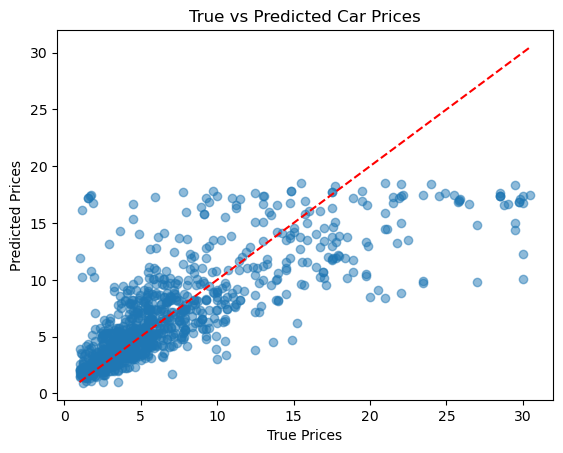

In [51]:

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Car Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line
plt.show()


In [52]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.7266 - mae: 2.4293
Test Loss (MSE): 14.100769996643066
Test MAE: 2.3615055084228516



### Interpretation:

* **MAE (2.36)** means the predicted car prices deviate from actual prices by about 2.36 (in the scale of your target).
* **MSE (14.10)** is higher due to squaring of errors, emphasizing larger prediction mistakes.
* The model is reasonably accurate but can be improved for closer predictions.


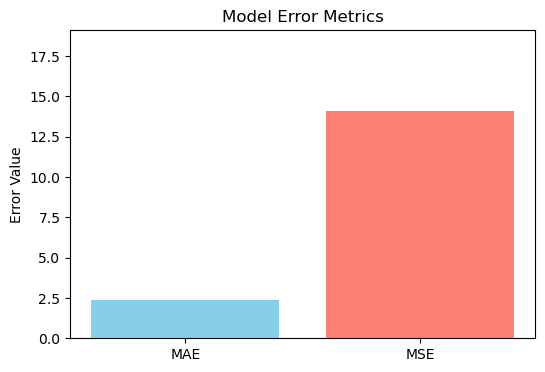

In [53]:

# Values from your results
mae = 2.36
mse = 14.10

# Plotting
plt.figure(figsize=(6,4))
plt.bar(['MAE', 'MSE'], [mae, mse], color=['skyblue', 'salmon'])
plt.title('Model Error Metrics')
plt.ylabel('Error Value')
plt.ylim(0, max(mse, mae) + 5)
plt.show()


In [56]:
cleaned_data.to_csv('cleaned_car_data.csv', index=False)